### Case Studies - Travel Insurance

Travel Assured is a travel insurance company. Due to the COVID pandemic, they have had to cut their marketing budget by over 50%. It is more important than ever that they advertise in the right places and to the right people. Travel Assured has plenty of data on their current customers as well as people who got quotes but never bought insurance. They want to know if there are differences in the travel habits between customers and non-customers - they believe they are more likely to travel often (buying tickets from frequent flyer miles) and travel abroad, You will be presenting to the CEO.

#### Descriptive Data:

Age : Numeric, the customer’s age

Employment Type : Character, the sector of employment

GraduateOrNot : Character, whether the customer is a college graduate

AnnualIncome : Numeric, the customer’s yearly income

FamilyMembers : Numeric, the number of family members living with the customer

ChronicDiseases : Numeric, whether the customer has any chronic conditions

FrequentFlyer : Character, whether a customer books frequent tickets

EverTravelledAbroad : Character, has the customer ever travelled abroad

TravelInsurance : Numeric, whether the customer bought travel insurance

#### Table of Contents:

Exploratory Data Analysis

Conclusions

In [85]:
import pandas as pd 
import numpy as np 
import matplotlib.pyplot as plt
import seaborn as sns 
from sklearn import preprocessing 

%matplotlib inline

In [86]:
df = pd.read_csv('travel_insurance.csv')

In [87]:
# Check data head
df.head()

,Age,Employment Type,GraduateOrNot,AnnualIncome,FamilyMembers,ChronicDiseases,FrequentFlyer,EverTravelledAbroad,TravelInsurance
0,31,Government Sector,Yes,400000,6,1,No,No,0
1,31,Private Sector/Self Employed,Yes,1250000,7,0,No,No,0
2,34,Private Sector/Self Employed,Yes,500000,4,1,No,No,1
3,28,Private Sector/Self Employed,Yes,700000,3,1,No,No,0
4,28,Private Sector/Self Employed,Yes,700000,8,1,Yes,No,0


In [88]:
# Check tail of the data
df.tail()

,Age,Employment Type,GraduateOrNot,AnnualIncome,FamilyMembers,ChronicDiseases,FrequentFlyer,EverTravelledAbroad,TravelInsurance
1982,33,Private Sector/Self Employed,Yes,1500000,4,0,Yes,Yes,1
1983,28,Private Sector/Self Employed,Yes,1750000,5,1,No,Yes,0
1984,28,Private Sector/Self Employed,Yes,1150000,6,1,No,No,0
1985,34,Private Sector/Self Employed,Yes,1000000,6,0,Yes,Yes,1
1986,34,Private Sector/Self Employed,Yes,500000,4,0,No,No,0


In [89]:
#Check data info
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1987 entries, 0 to 1986
Data columns (total 9 columns):
 #   Column               Non-Null Count  Dtype 
---  ------               --------------  ----- 
 0   Age                  1987 non-null   int64 
 1   Employment Type      1987 non-null   object
 2   GraduateOrNot        1987 non-null   object
 3   AnnualIncome         1987 non-null   int64 
 4   FamilyMembers        1987 non-null   int64 
 5   ChronicDiseases      1987 non-null   int64 
 6   FrequentFlyer        1987 non-null   object
 7   EverTravelledAbroad  1987 non-null   object
 8   TravelInsurance      1987 non-null   int64 
dtypes: int64(5), object(4)
memory usage: 139.8+ KB


In [90]:
# Check shape of the data
df.shape

(1987, 9)

The dataset contains total 1987 rows and 9 columns

In [91]:
# Check summary
df.describe()

,Age,AnnualIncome,FamilyMembers,ChronicDiseases,TravelInsurance
count,1987.000000,1.987000e+03,1987.000000,1987.000000,1987.000000
mean,29.650226,9.327630e+05,4.752894,0.277806,0.357323
std,2.913308,3.768557e+05,1.609650,0.448030,0.479332
min,25.000000,3.000000e+05,2.000000,0.000000,0.000000
25%,28.000000,6.000000e+05,4.000000,0.000000,0.000000
50%,29.000000,9.000000e+05,5.000000,0.000000,0.000000
75%,32.000000,1.250000e+06,6.000000,1.000000,1.000000
max,35.000000,1.800000e+06,9.000000,1.000000,1.000000


In [92]:
# Check data type
df.dtypes

Age                     int64
Employment Type        object
GraduateOrNot          object
AnnualIncome            int64
FamilyMembers           int64
ChronicDiseases         int64
FrequentFlyer          object
EverTravelledAbroad    object
TravelInsurance         int64
dtype: object

In [93]:
# Check missing values
df.isnull().any()

Age                    False
Employment Type        False
GraduateOrNot          False
AnnualIncome           False
FamilyMembers          False
ChronicDiseases        False
FrequentFlyer          False
EverTravelledAbroad    False
TravelInsurance        False
dtype: bool

In [94]:
df.isnull().sum()

Age                    0
Employment Type        0
GraduateOrNot          0
AnnualIncome           0
FamilyMembers          0
ChronicDiseases        0
FrequentFlyer          0
EverTravelledAbroad    0
TravelInsurance        0
dtype: int64

There are no any missing values in the dataset. 

Text(0.5, 0.98, 'bought insurance vs Did not bought insurance')

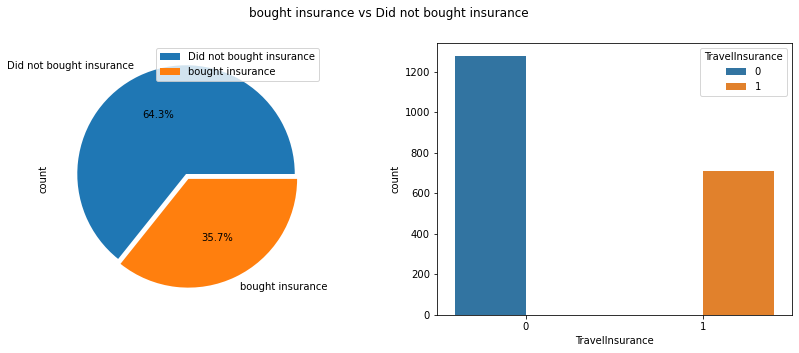

In [95]:
total_Noshow=df['TravelInsurance'].value_counts()
total_Noshow.index=['Did not bought insurance','bought insurance']

f,ax=plt.subplots(1,2,figsize=(14,5))
total_Noshow.plot.pie(explode=[0.05,0],autopct='%1.1f%%',ax=ax[0])
ax[0].set_ylabel('count')
ax[0].legend()

sns.countplot(x='TravelInsurance',hue='TravelInsurance',data=df,ax=ax[1])
f.suptitle('bought insurance vs Did not bought insurance')

We can take a note that the customers who did not bought the travel insurance policies has a higher percentage (64.3%) than the customer who wished to purchase.

Text(0.5, 0.98, "bought insurance Age Distribution vs Not  Didn't bought insurance Age Distribution")

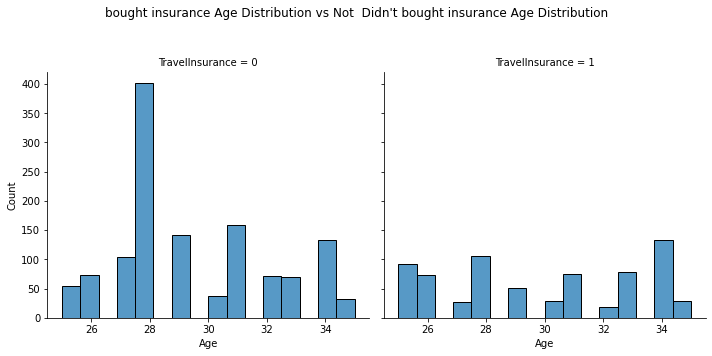

In [96]:
# Average age and its counts who has purchased the 'Travel Insurance'

rel =sns.displot(x="Age", col="TravelInsurance",data=df)
rel.fig.subplots_adjust(top=.8)
rel.fig.suptitle("bought insurance Age Distribution vs Not  Didn't bought insurance Age Distribution")

In [97]:
Age_mean = df.groupby('TravelInsurance')['Age'].mean()
Age_mean.index=['The average age of those who did not bought insurance :','The average age of those who bought insurance']
Age_mean

The average age of those who did not bought insurance :    29.517619
The average age of those who bought insurance              29.888732
Name: Age, dtype: float64

**Note:**
 We see that the 'Age' factor doesn't impact the purchase of Travel Insurance.

 And the average age is also 29 which looks like it has nothing to do with the Travel Insurance.

 People ages in 27 shows the least purchaser of Travel Insurance despite large in numbers.

Text(0.5, 0.98, 'Private Sector/Self Employed vs Government Sector')

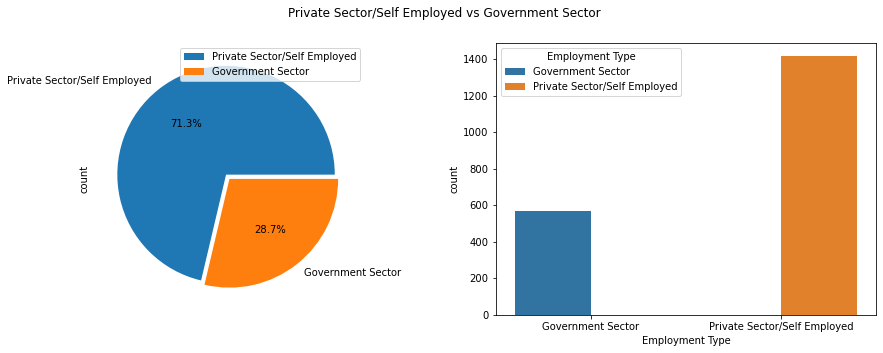

In [98]:
# Similarly checking the employment category if it impacts the over all purchase of 'Travel Insurance'
# Let's explore the 'employment' category and its types.

DFEmployment=df['Employment Type'].value_counts()

f,ax=plt.subplots(1,2,figsize=(15,5))
DFEmployment.plot.pie(explode=[0.05,0],autopct='%1.1f%%',ax=ax[0])
ax[0].set_ylabel('count')
ax[0].legend()

sns.countplot(x='Employment Type',hue="Employment Type",data=df,ax=ax[1])
f.suptitle("Private Sector/Self Employed vs Government Sector")

We see that the people belongs to the Private sector or Self Employed more than the Government Sector. 

Text(0.5, 1.0, 'Employment Type vs Travel Insurance')

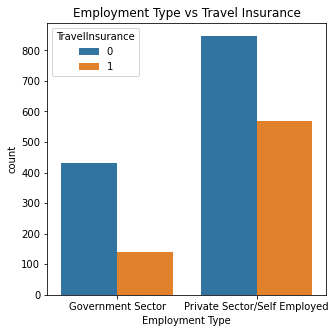

In [99]:
# Exploring 'Employment' category if it has anything to do with 'Travel Insurance'.

f,ax=plt.subplots(1,figsize=(5,5))
sns.countplot(x='Employment Type',hue='TravelInsurance',data=df)
plt.title('Employment Type vs Travel Insurance')

In [100]:
# Employment and its counts:

df.groupby(['Employment Type','TravelInsurance'])['Employment Type'].count() / df.groupby('Employment Type')['Employment Type'].count()

Employment Type               TravelInsurance
Government Sector             0                  0.754386
                              1                  0.245614
Private Sector/Self Employed  0                  0.597742
                              1                  0.402258
Name: Employment Type, dtype: float64

**Note:**
We can see that people who works as a Private Sector/ Self Employed has a greater purchasing power (0.402258) whereas scores for the people who works in Government sector is (0.245614)

#### We suppose that if a person is a graduate, his opportunity to work is greater, and therefore a greater Annual Income, but does it have anything to do with the fact that the person buys travel insurance?

let's see if there is any relationship between being a Graduate and an Annual Income

0.10806586483580931

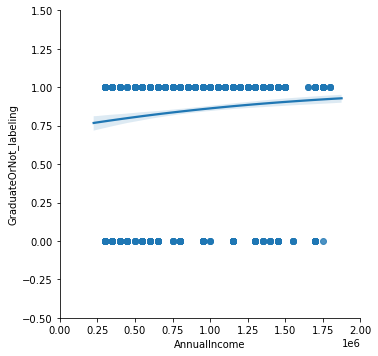

In [101]:
# Get mappings of a label encoder 

le=preprocessing.LabelEncoder()
df['GraduateOrNot_labeling'] = le.fit_transform(df['GraduateOrNot'])
sns.lmplot(x="AnnualIncome", y="GraduateOrNot_labeling", data=df,logistic=True, truncate=False)
plt.ylim(-0.5, 1.5)
plt.xlim(0, 2000000)
display(df['GraduateOrNot_labeling'].corr(df['AnnualIncome']))

The graph shows us positive but also a weak relationship.

Does Graduates has anything to do with it ? Let's check if the Graduates purchases the Travel Insurance.

In [102]:
display(df['GraduateOrNot_labeling'].corr(df['TravelInsurance']))

0.01893351894198786

Text(0.5, 0.98, 'Graduate Or Not')

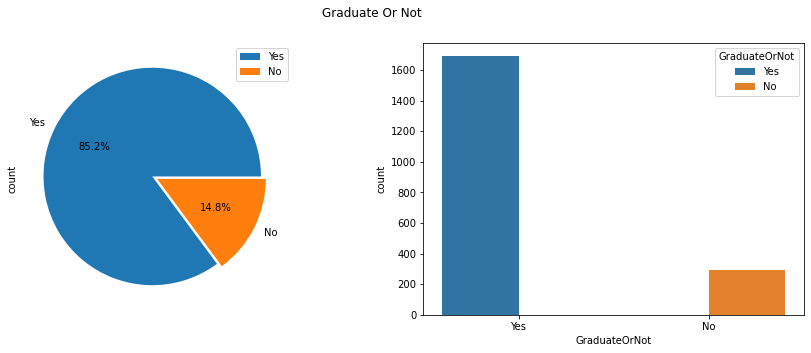

In [103]:
DFGraduateOrNot=df['GraduateOrNot'].value_counts()

f,ax=plt.subplots(1,2,figsize=(15,5))
DFGraduateOrNot.plot.pie(explode=[0.05,0],autopct='%1.1f%%',ax=ax[0])
ax[0].set_ylabel('count')
ax[0].legend()

sns.countplot(x='GraduateOrNot',hue="GraduateOrNot",data=df,ax=ax[1])
f.suptitle("Graduate Or Not")

We can see that the proportion of people who are graduates(85.2)% are more than the non-graduates (14.8)%

Now let's see if the Graduates or Non-Graduates has anything to do with the Travel Insurance purchase.

Text(0.5, 1.0, 'GraduateOrNot vs Travel Insurance')

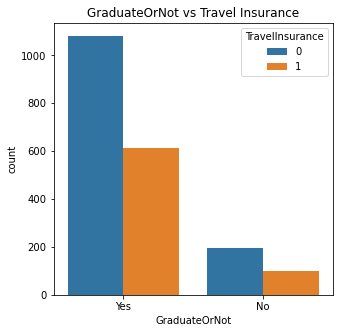

In [104]:
f,ax=plt.subplots(1,figsize=(5,5))
sns.countplot(x='GraduateOrNot',hue='TravelInsurance',data=df)
plt.title('GraduateOrNot vs Travel Insurance')

In [105]:
df.groupby(['GraduateOrNot','TravelInsurance'])['GraduateOrNot'].count() / df.groupby('GraduateOrNot')['GraduateOrNot'].count()

GraduateOrNot  TravelInsurance
No             0                  0.664407
               1                  0.335593
Yes            0                  0.638889
               1                  0.361111
Name: GraduateOrNot, dtype: float64

**Note:** Regardless of a person if he/she is a graduate or not, we'll find the probability of their insurance purchase is equal as their purchase rates are equal.

Text(0.5, 1.0, 'Annual Income distributoin vs Travel Insurance')

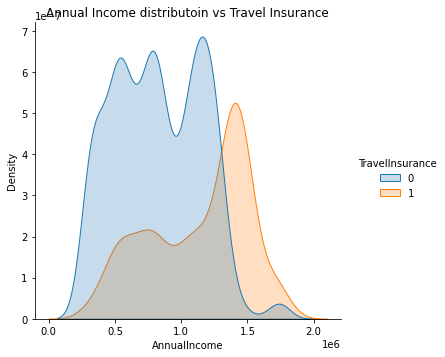

In [106]:
sns.displot(df, x='AnnualIncome', hue='TravelInsurance', kind='kde', fill=True)
plt.title('Annual Income distributoin vs Travel Insurance')

It clearly shows that those who have higher annual incomes are superior at buying travel insurance for sure.

0.396763204279091

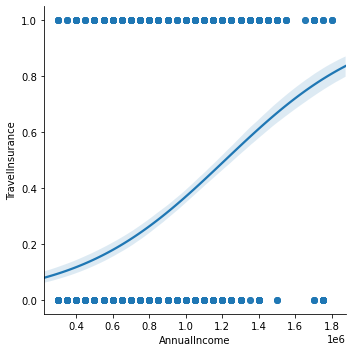

In [107]:
sns.lmplot(x='AnnualIncome', y='TravelInsurance', data=df,  logistic=True, truncate=False)
display(df['TravelInsurance'].corr(df['AnnualIncome']))

It shows that there is a positive and a moderate relationship

Text(0.5, 0.98, 'high Annual Income vs low Annual Income')

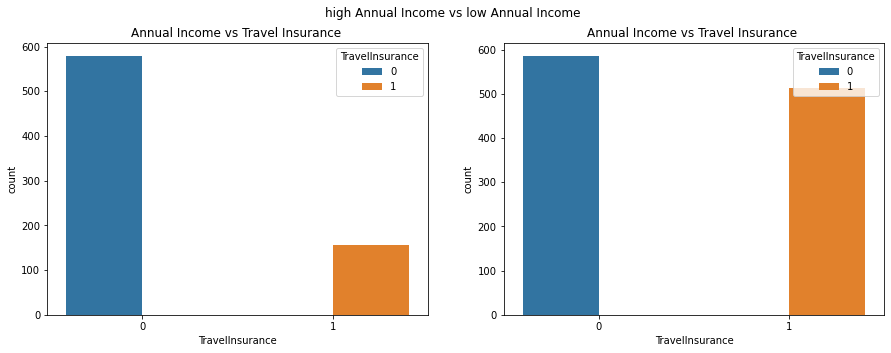

In [108]:
low_AnnualIncome=df[(df['AnnualIncome']<800000)]
high_AnnualIncome=df[(df['AnnualIncome']>800000)]



f,ax=plt.subplots(1,2,figsize=(15,5))

sns.countplot(x='TravelInsurance',hue='TravelInsurance',data=low_AnnualIncome,ax=ax[0])
ax[0].set_title("Annual Income vs Travel Insurance ")

sns.countplot(x='TravelInsurance',hue='TravelInsurance',data=high_AnnualIncome,ax=ax[1])
ax[1].set_title("Annual Income vs Travel Insurance ")
f.suptitle("high Annual Income vs low Annual Income")

The number of people who do not buy travel insurance is approximately equal, whether their income is high or low, but see the difference who buy travel insurance, the number is clearly higher for high-income people.

We conclude that high-income people buy more, so we should care about that

#### Does the number of family members affects if he/she buys insurance or not?

Text(0.5, 1.0, 'Family Members vs Travel Insurance')

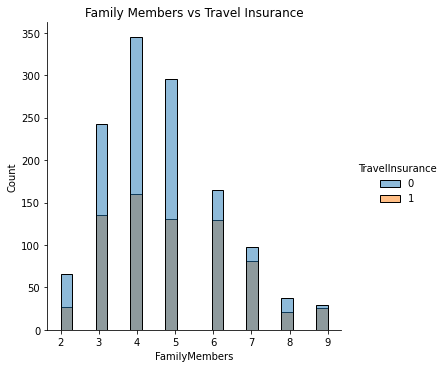

In [109]:
sns.displot(df, x='FamilyMembers', hue='TravelInsurance')
plt.title('Family Members vs Travel Insurance')

Both distributions are similar, let's go deeper

We settled it early, when the number of family members was more than five, the proportion of buyers increases and approached 50 percent.

Text(0.5, 0.98, 'Percentage of people with chronic diseases')

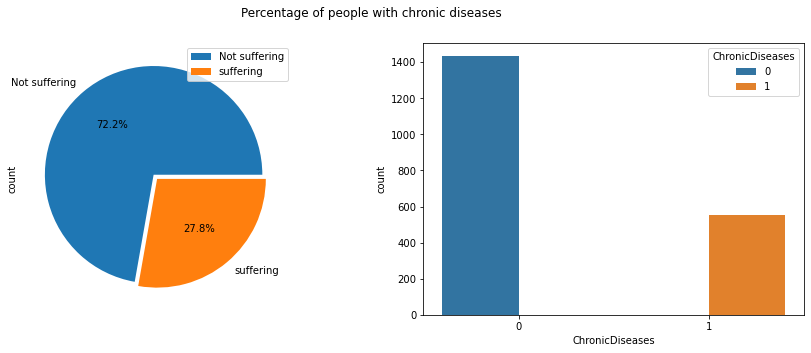

In [110]:
dfChronicDiseases=df['ChronicDiseases'].value_counts()
dfChronicDiseases.index=["Not suffering","suffering"]

f,ax=plt.subplots(1,2,figsize=(15,5))
dfChronicDiseases.plot.pie(explode=[0.05,0],autopct='%1.1f%%',ax=ax[0])
ax[0].set_ylabel('count')
ax[0].legend()

sns.countplot(x='ChronicDiseases',hue="ChronicDiseases",data=df,ax=ax[1])
f.suptitle("Percentage of people with chronic diseases")

We can also see that the majority (72.2)% people are not suffering from any chronic diseases where as (27.8)% people do suffers from it. 

Text(0.5, 1.0, 'Chronic Diseases vs Travel Insurance')

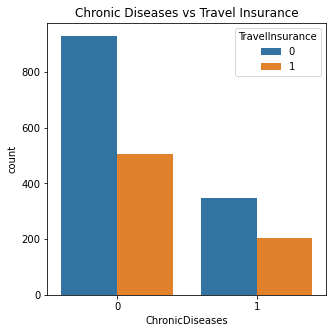

In [111]:
f,ax=plt.subplots(1,figsize=(5,5))
sns.countplot(x='ChronicDiseases',hue='TravelInsurance',data=df)
plt.title('Chronic Diseases vs Travel Insurance')

In [112]:
df.groupby(['ChronicDiseases','TravelInsurance'])['ChronicDiseases'].count() / df.groupby('ChronicDiseases')['ChronicDiseases'].count()

ChronicDiseases  TravelInsurance
0                0                  0.648084
                 1                  0.351916
1                0                  0.628623
                 1                  0.371377
Name: ChronicDiseases, dtype: float64

**Note:** Regardless of people suffering from chronic diseases or not , Their purchase rates are still equal.

Let's continue what we started, a client who books frequent tickets will probably buy travel insurance to make sure!

Let's see if there is a relationship between the fact that the people who book frequent tickets also chooses to buy travel insurance

Text(0.5, 1.0, 'correlation coefficient Frequent Flyer and Travel Insurance ')

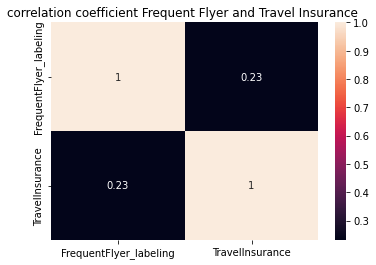

In [113]:
# Creating a heat map 

le=preprocessing.LabelEncoder()
df['FrequentFlyer_labeling'] = le.fit_transform(df['FrequentFlyer'])
display()
f,ax=plt.subplots(1,1,figsize=(6,4))

sns.heatmap(df[['FrequentFlyer_labeling','TravelInsurance']].corr(),annot=True)
ax.set_title('correlation coefficient Frequent Flyer and Travel Insurance ')

We've got a positive relationship but it is weak.

Text(0.5, 1.0, 'Frequent Flyer vs Travel Insurance')

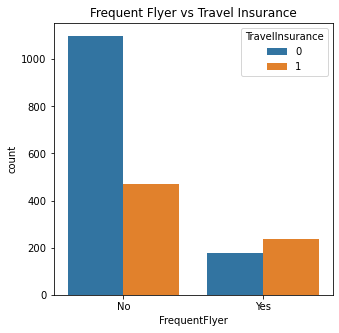

In [114]:
# Creating a countplot and grouping them to see if there is any relationship between frequent travellers and their purchases of Travel insurance.

f,ax=plt.subplots(1,figsize=(5,5))
sns.countplot(x='FrequentFlyer',hue="TravelInsurance",data=df)
plt.title("Frequent Flyer vs Travel Insurance")

In [115]:
df.groupby(['FrequentFlyer','TravelInsurance'])['FrequentFlyer'].count() / df.groupby('FrequentFlyer')['FrequentFlyer'].count()

FrequentFlyer  TravelInsurance
No             0                  0.700000
               1                  0.300000
Yes            0                  0.426859
               1                  0.573141
Name: FrequentFlyer, dtype: float64

We can clearly see that the person is a frequent traveller, the probability of buying travel insurance is greater. 

Text(0.5, 1.0, 'correlation coefficient Ever Travelled Abroad  and Travel Insurance ')

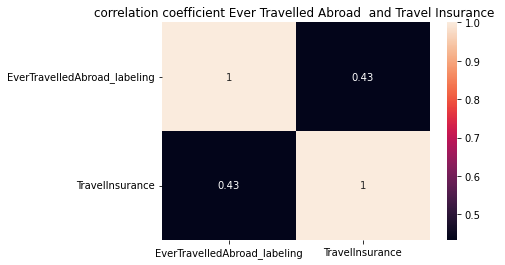

In [116]:
#Heat maps of a label encoder 

le=preprocessing.LabelEncoder()
df['EverTravelledAbroad_labeling'] = le.fit_transform(df['EverTravelledAbroad'])
display()
f,ax=plt.subplots(1,1,figsize=(6,4))

sns.heatmap(df[['EverTravelledAbroad_labeling','TravelInsurance']].corr(),annot=True)
ax.set_title('correlation coefficient Ever Travelled Abroad  and Travel Insurance ')

It seems that the relationship is moderate and positive. Perhaps if the customer travels abroad before, he will increase the likelihood of purchasing travel insurance.

Text(0.5, 1.0, 'Ever Travelled Abroad vs Travel Insurance')

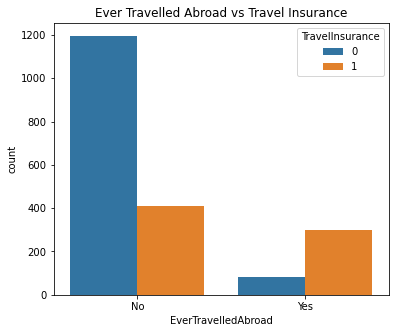

In [117]:
f,ax=plt.subplots(1,figsize=(6,5))
sns.countplot(x='EverTravelledAbroad',hue="TravelInsurance",data=df)
plt.title("Ever Travelled Abroad vs Travel Insurance")

In [118]:
df.groupby(['EverTravelledAbroad','TravelInsurance'])['EverTravelledAbroad'].count() / df.groupby('EverTravelledAbroad')['EverTravelledAbroad'].count()

EverTravelledAbroad  TravelInsurance
No                   0                  0.743622
                     1                  0.256378
Yes                  0                  0.215789
                     1                  0.784211
Name: EverTravelledAbroad, dtype: float64

Well, the matter is very clear here for the customers who traveled abroad because of their desire to buy travel insurance more than others, Their ratio is 0.8 Approximately

### Conclusions:

We note that the customers who Didn't bought insurance (64.3%) rate is large

I don't think age has anything to do with buying Travel insurance

The customer's type of employment is the private sector / self-employed and their percentage is (71.3%), where the percentage 
of their purchases is 0.402258, while the percentage of their purchases in the government sector is 0.245614, so we must give 
this category some attention in our Marketing campaign.

that high-income customer buy travel insurance more, so we should care about that

When Customer is Frequent Flyer, the probability of buying travel insurance is greater.

Customers who traveled abroad want to buy travel insurance more than others, approximately 0.8